In [1]:
%matplotlib inline
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import pandas as pd
import seaborn as sns

In [2]:
t = np.linspace(0,10,2000)

In [3]:
k = 2
b = 2
x0 = [5,0]

In [4]:
def fun(xi,t):
    x = xi[0]
    v = xi[1]
    return [xi[1],-k*xi[0]-b*xi[1]]

In [5]:
sol = odeint(fun, x0, t)

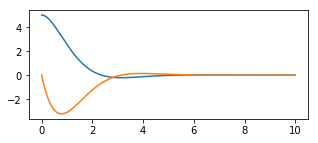

In [6]:
plt.figure(figsize=(5,2))
plt.plot(t,sol)

In [7]:
Sigma = np.array([[5,0],[0,5]])
mu = np.array([0,0])
tau = 0.1
#
N = 40
u = np.linspace(-10,10,N)
v = np.linspace(-10,10,N)
U,V = np.meshgrid(u,v)
#
P = np.zeros((N,N))
P_exp = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        x = np.array([U[i,j],V[i,j]])
        P[i,j] = multivariate_normal.pdf(x,mu,Sigma)
        P_exp[i,j] = 1- np.exp(-tau*np.linalg.norm(x))

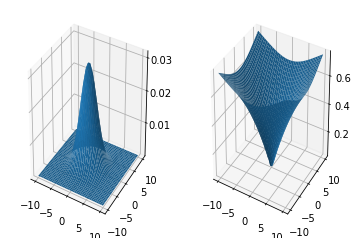

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(U, V, P)
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(U, V, P_exp)

In [9]:
def CumExpDist(t,tau):
    return 1 - np.exp(-tau*t)
def SpatialExpDist(x,tau):
    return 1- np.exp(-tau*np.linalg.norm(x))
#
p_sol = np.array([multivariate_normal.pdf(sol[i],mu,Sigma) for i in range(len(sol))])#np.array([SpatialExpDist(sol[i],0.01) for i in range(len(sol))])#
p_t = np.array([CumExpDist(t[i],0.2) for i in range(len(sol))])
P = np.multiply(p_sol,p_t)

In [10]:
Event_flag = np.array([np.random.binomial(1,P[i]) for i in range(len(sol))])

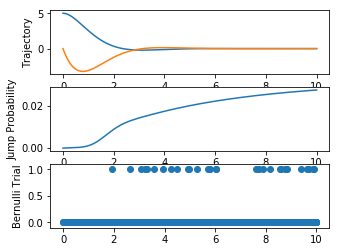

In [11]:
plt.figure(figsize=(5,4))
plt.subplot(311)
plt.plot(t,sol)
plt.ylabel('Trajectory')
plt.subplot(312)
plt.plot(t,P)
plt.ylabel('Jump Probability')
plt.subplot(313)
plt.ylabel('Bernulli Trial')
plt.scatter(t,Event_flag)

In [12]:
Event_index = []
for i in range(len(Event_flag)):
    if Event_flag[i]>0:
        Event_index.append(i)
Event_states = sol[Event_index]

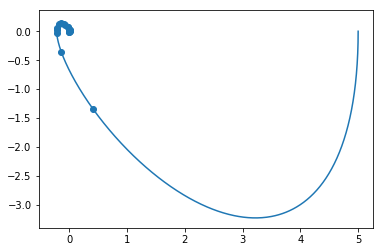

In [13]:
plt.figure()
plt.plot(sol[:,0],sol[:,1])
plt.scatter(Event_states[:,0],Event_states[:,1])

In [14]:
#jump map
def jump(x,t):
    mu = (x + 1*np.random.randn(1,2)).tolist()
    Sigma = [[5,0],[0,5]]
    return np.random.multivariate_normal(mu[0],Sigma)

In [15]:
# integrate the hybrid system
max_events = 5000
event_counter = 0
t = np.linspace(0,10,1000)
x_tot = [0,0,0]
x_event = [0,0,0]
x_reset = [0,0]
t_tot = []
while event_counter<max_events:
    sol = odeint(fun,x0,t)
    for i in range(len(sol)):
        P = multivariate_normal.pdf(sol[i],mu,Sigma)*CumExpDist(t[i],0.4)
        Event = np.random.binomial(1,P)
        if Event:
            flag = 1;
            x0 = jump(sol[i],t[i])
            x_event = np.vstack((x_event,np.hstack((sol[i],t[i]))))
            x_reset = np.vstack((x_reset,x0))
            break
    x_tot = np.vstack((x_tot,np.hstack((sol[:i],t[:i].reshape(i,1)))))
    if event_counter==0:
        t_tot = np.hstack((t_tot,t[:i])) 
        
    else:
        t_tot = np.hstack((t_tot,t[:i]+t_tot[-1]))
    if flag:
        flag = 0
        event_counter += 1
    else:
        x0 = sol[-1]
    if (100*event_counter)%5000==0:
        print((100*event_counter)/5000)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0


<IPython.core.display.Javascript object>


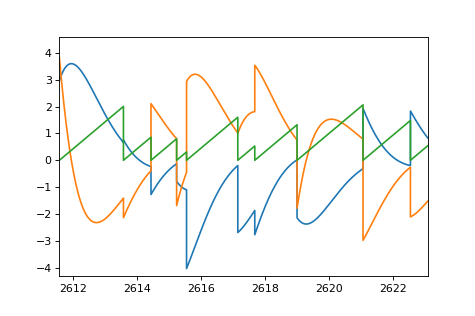

In [80]:
Ttot = t_tot
Xtot = x_tot[1:]
Xtot.shape
plt.figure()
plt.plot(Ttot.reshape(len(Ttot),1),Xtot[:len(Ttot)]);

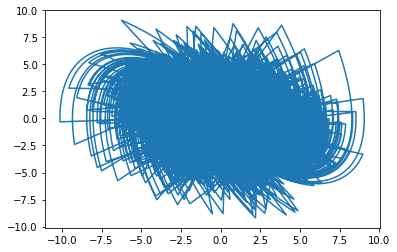

In [17]:
plt.figure()
plt.plot(x_tot[1:,0],x_tot[1:,1]);
plt.scatter(x_event[1:,0],x_event[1:,1]);

<IPython.core.display.Javascript object>


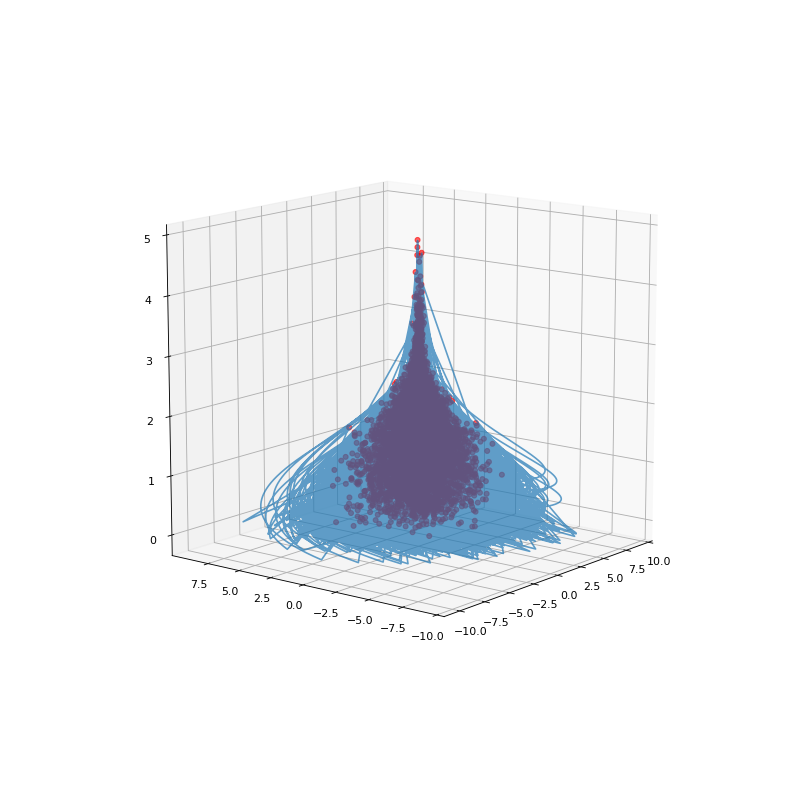

In [81]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d')
ax.plot(xs = Xtot[:,0], ys = Xtot[:,1],zs = Xtot[:,2],alpha = 0.7)
ax.scatter(xs = x_event[:,0], ys = x_event[:,1],zs = x_event[:,2],alpha = .6,color = 'red')

<IPython.core.display.Javascript object>


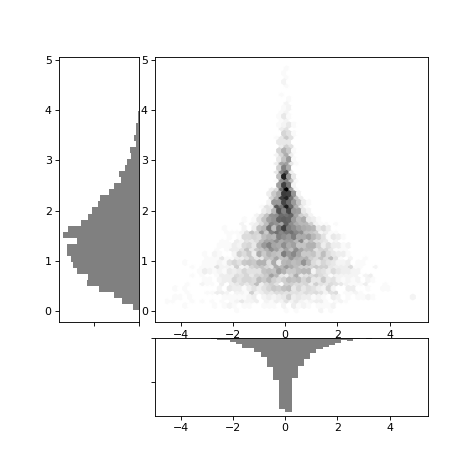

In [63]:
# fig = plt.figure(figsize = (10,3))
# ax1 = fig.add_subplot(111)

#with sns.axes_style("white"):
#    sns.jointplot(x=x_event[1:,0],y=x_event[1:,2],kind="hex",color="k");
# Set up the axes with gridspec
x = x_event[1:,0]
y = x_event[1:,2]
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.hexbin(x,y,gridsize=50,cmap='gray_r')#plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

<IPython.core.display.Javascript object>


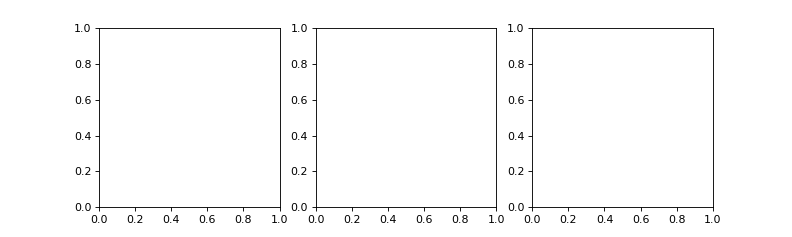

In [32]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize = (10,3))


In [36]:
axes.flat[0]

<IPython.core.display.Javascript object>


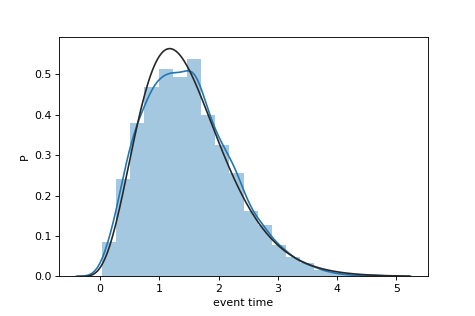

Text(0.5,0,'event time')

In [67]:
from scipy.stats import norm
from scipy.stats import gamma
plt.figure()
sns.distplot(x_event[1:,2],bins = 20, fit = gamma);
plt.ylabel('P')
plt.xlabel('event time')

<IPython.core.display.Javascript object>


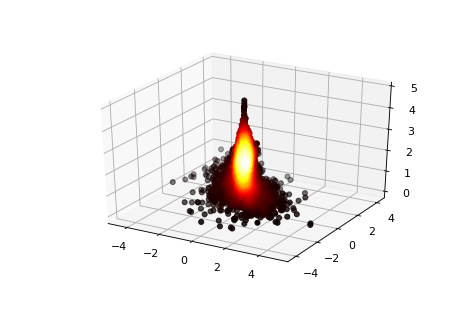

In [68]:
%matplotlib notebook
import matplotlib.pyplot as plt

from scipy import stats
x = x_event[1:,0]
y = x_event[1:,1]
z = x_event[1:,2]

xyz = np.vstack([x,y,z])
density = stats.gaussian_kde(xyz)(xyz) 

idx = density.argsort()
x, y, z, density = x[idx], y[idx], z[idx], density[idx]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=density,cmap=plt.hot())
plt.show()

<IPython.core.display.Javascript object>


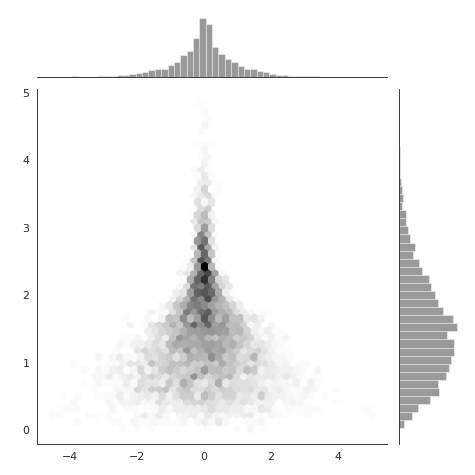

In [69]:
with sns.axes_style("white"):
        sns.jointplot(x=x_event[1:,0], y=x_event[1:,2], kind="hex", color="k");

<IPython.core.display.Javascript object>


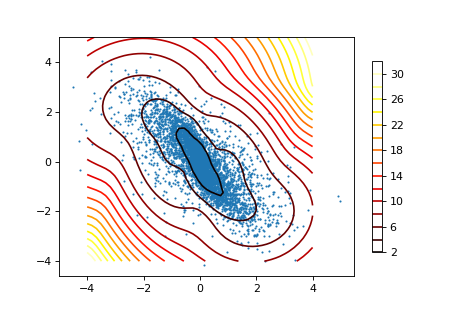

In [79]:
from matplotlib.colors import LogNorm
from sklearn import mixture

# Fit mixure of gaussian
clf = mixture.GaussianMixture(n_components=10, covariance_type='full')
clf.fit(np.hstack((x_event[1:,0].reshape(-1,1),x_event[1:,1].reshape(-1,1))))

x = np.linspace(-4., 4.)
y = np.linspace(-4., 5.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

plt.figure()
CS = plt.contour(X, Y, Z,20)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(x_event[1:,0], x_event[1:,1], .8)
plt.show()

In [ ]:
np.hstack((x_event[1:,0].reshape(-1,1),x_event[1:,2].reshape(-1,1)))

In [ ]:
#x_event.mean(0)
Se = x_event[1:,:3].T.dot(x_event[1:,:3])/len(x_event)

In [ ]:
DXtot = [0]
i = len(Xtot)-1
while i>0:
    if Ttot[i]-Ttot[i-1] == 0:
        Ttot_r = np.delete(Ttot,i-1)
        Xtot_r = np.delete(Xtot,i-1,axis = 0)
        print(i)
    i -= 1

In [ ]:
DeltaXtot = Xtot_r[1:]-Xtot_r[:-1]
DXtot = [np.linalg.norm(p) for p in DeltaXtot]

In [ ]:
plt.figure()
plt.plot(Ttot_r[1:],DXtot)